In [32]:
import numpy as np
import seaborn as sns
import pandas as pd
from main import separate_cols
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

df = pd.read_csv(r"working_data\separated_cols.csv")
df_unique = pd.read_csv(r"working_data\unique_counts.csv")

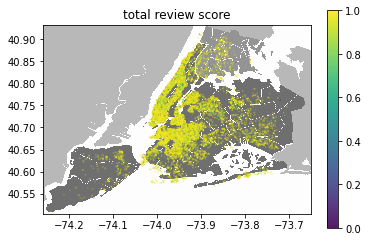

In [33]:
img = plt.imread("src_data\\New_York_City_.jpg")
fig, ax = plt.subplots()
topeight = (40.933, -73.652)
leftdown = (40.505, -74.259)
ax.set_title("total review score")
ax.imshow(img, extent=[leftdown[1], topeight[1], leftdown[0], topeight[0]], interpolation='none')
sc = ax.scatter(df["longitude"], df["latitude"], c=df["review_scores_rating"], alpha=0.9, s=0.05)
plt.colorbar(sc)

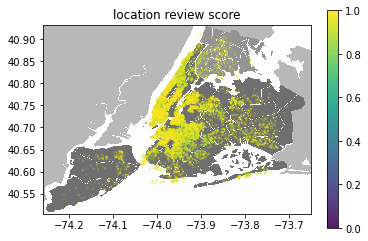

In [34]:
img = plt.imread("src_data\\New_York_City_.jpg")
fig, ax = plt.subplots()
topeight = (40.933, -73.652)
leftdown = (40.505, -74.259)
ax.set_title("location review score")
ax.imshow(img, extent=[leftdown[1], topeight[1], leftdown[0], topeight[0]], interpolation='none')
sc = ax.scatter(df["longitude"], df["latitude"], c=df["review_scores_location"], alpha=0.9, s=0.05)
plt.colorbar(sc)

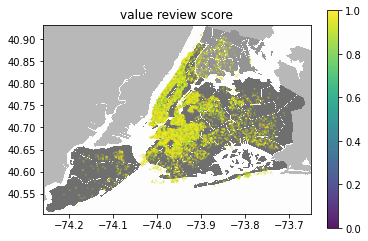

In [35]:
img = plt.imread("src_data\\New_York_City_.jpg")
fig, ax = plt.subplots()
topeight = (40.933, -73.652)
leftdown = (40.505, -74.259)
ax.set_title("value review score")
ax.imshow(img, extent=[leftdown[1], topeight[1], leftdown[0], topeight[0]], interpolation='none')
sc = ax.scatter(df["longitude"], df["latitude"], c=df["review_scores_value"], alpha=0.9, s=0.05)
plt.colorbar(sc)

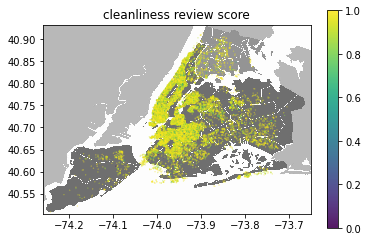

In [36]:
img = plt.imread("src_data\\New_York_City_.jpg")
fig, ax = plt.subplots()
topeight = (40.933, -73.652)
leftdown = (40.505, -74.259)
ax.set_title("cleanliness review score")
ax.imshow(img, extent=[leftdown[1], topeight[1], leftdown[0], topeight[0]], interpolation='none')
sc = ax.scatter(df["longitude"], df["latitude"], c=df["review_scores_cleanliness"], alpha=0.9, s=0.05)
plt.colorbar(sc)

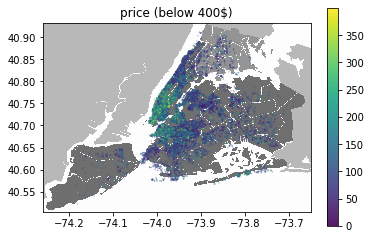

In [37]:
img = plt.imread("src_data\\New_York_City_.jpg")
fig, ax = plt.subplots()
topeight = (40.933, -73.652)
leftdown = (40.505, -74.259)
ax.set_title("price (below 400$)")
ax.imshow(img, extent=[leftdown[1], topeight[1], leftdown[0], topeight[0]], interpolation='none')
df_w = df.loc[df["price"] < 400]
c = np.array(df_w["price"])
sc = ax.scatter(df_w["longitude"], df_w["latitude"], c=c, alpha=0.9, s=0.05)
plt.colorbar(sc)

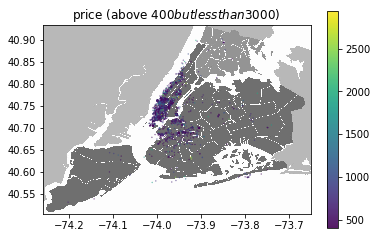

In [38]:
img = plt.imread("src_data\\New_York_City_.jpg")
fig, ax = plt.subplots()
topeight = (40.933, -73.652)
leftdown = (40.505, -74.259)
ax.set_title("price (above 400$ but less than 3000$)")
ax.imshow(img, extent=[leftdown[1], topeight[1], leftdown[0], topeight[0]], interpolation='none')
df_w = df.loc[df["price"] > 400].loc[df["price"] < 3000]
c = np.array(df_w["price"])
sc = ax.scatter(df_w["longitude"], df_w["latitude"], c=c, alpha=0.9, s=0.1)
plt.colorbar(sc)


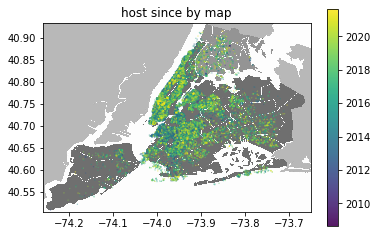

In [39]:
img = plt.imread("src_data\\New_York_City_.jpg")
fig, ax = plt.subplots()
topeight = (40.933, -73.652)
leftdown = (40.505, -74.259)
ax.set_title("host since by map")
ax.imshow(img, extent=[leftdown[1], topeight[1], leftdown[0], topeight[0]], interpolation='none')
sc = ax.scatter(df["longitude"], df["latitude"], c=df["host_since"], alpha=0.9, s=0.05)
plt.colorbar(sc)

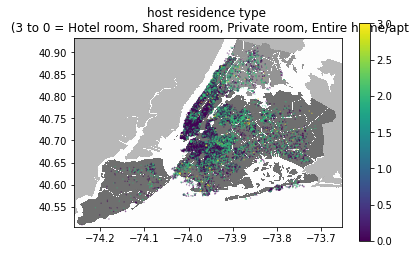

In [40]:
img = plt.imread("src_data\\New_York_City_.jpg")
fig, ax = plt.subplots()
topeight = (40.933, -73.652)
leftdown = (40.505, -74.259)
ax.set_title("host residence type \n (3 to 0 = "'Hotel room, Shared room, Private room, Entire home/apt')
ax.imshow(img, extent=[leftdown[1], topeight[1], leftdown[0], topeight[0]], interpolation='none')

sc = ax.scatter(df["longitude"], df["latitude"],
                c=df["room_type"].astype('category').cat.codes, alpha=1, s=0.05)
plt.colorbar(sc)


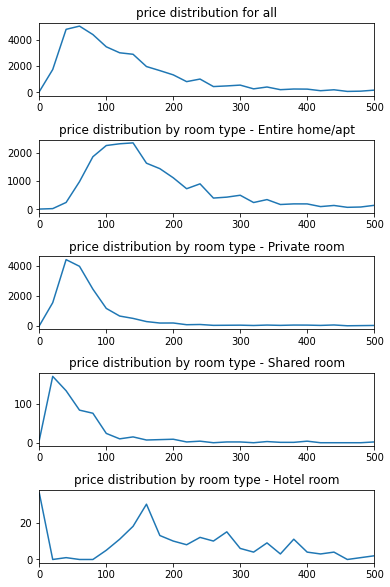

In [41]:
fig, ax = plt.subplots(5)
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=2, wspace=None, hspace=0.6)

df_ww = list(zip(*sorted(df_unique["price"].dropna().apply(lambda x: eval(x)).values)))
ax[0].plot(df_ww[0], df_ww[1])
ax[0].set_title("price distribution for all")
ax[0].set_xlim(0, 500)

df_w = df[["price", 'room_type']].copy()
df_w["price"] = df_w["price"].apply(lambda x: int(x / 20) * 20 if not math.isnan(x) else x)

y_t = [y_t[0] for y_t in df_w['room_type'].value_counts().items()]
y = []
for y_tt in y_t:
    a=df_w.loc[df_w['room_type'] == y_tt]['price'].value_counts()
    y.append([a.get(price_t) if a.get(price_t) is not None else 0
              for price_t in df_ww[0]])

for i in range(1,5):
    ax[i].plot(df_ww[0], y[i-1])
    ax[i].set_title("price distribution by room type - " + y_t[i-1])
    ax[i].set_xlim(0, 500)

(400.0, 1000.0)

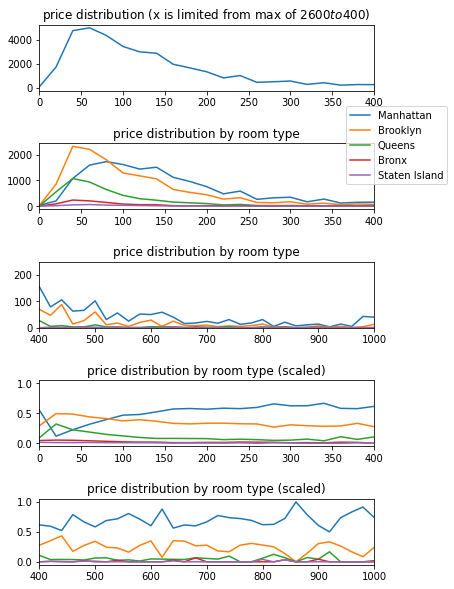

In [56]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5)
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=2, wspace=None, hspace=0.8)

df_ww = list(zip(*sorted(df_unique["price"].dropna().apply(lambda x: eval(x)).values)))
ax1.plot(df_ww[0], df_ww[1])
ax1.set_title("price distribution (x is limited from max of 2600$ to 400$)")
ax1.set_xlim(0, 400)

df_w = df[["price", 'neighbourhood_group_cleansed']].copy()
df_w["price"] = df_w["price"].apply(lambda x: int(x / 20) * 20 if not math.isnan(x) else x)
df_w["neighbourhood_group_cleansed"] = df_w['neighbourhood_group_cleansed']#.apply(lambda x: int(x)+int((x-int(x))*4)/4 if not math.isnan(x) else x)

y_t = [y_t[0] for y_t in df_w['neighbourhood_group_cleansed'].value_counts().items()]
y = []
for y_tt in y_t:
    a=df_w.loc[df_w['neighbourhood_group_cleansed'] == y_tt]['price'].value_counts()
    y.append([a.get(price_t) if a.get(price_t) is not None else 0
                for price_t in df_ww[0]])
y=np.transpose(y)

ax2.plot(df_ww[0], y)
ax2.set_title("price distribution by room type")
ax2.set_xlim(0, 400)
ax2.legend(y_t, bbox_to_anchor=(0.9, 0.3))

ax3.plot(df_ww[0], y)
ax3.set_title("price distribution by room type")
ax3.set_xlim(400,1000)
ax3.set_ylim(0,250)

y = [np.array(y_tt)/sum(y_tt) for y_tt in y]
ax4.plot(df_ww[0], y)
ax4.set_title("price distribution by room type (scaled)")
ax4.set_xlim(0, 400)

ax5.plot(df_ww[0], y)
ax5.set_title("price distribution by room type (scaled)")
ax5.set_xlim(400,1000)

In [43]:
df_w=pd.read_csv("working_data\\normality_chart.csv")
def f(x):
    b=(0,0)
    for a in x:
        if type(a) is not str: continue
        b=tuple(map(sum, zip(eval(a), b)))
    return (b[0]/len(x),b[1]/len(x))
df_w=df_w.apply(f)
df_w.drop(['host_response_time', 'host_neighbourhood',
    'host_verifications', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
    'room_type','bathrooms', 'bathrooms_text', 'amenities',
    'has_availability', ], axis=1, inplace=True)
col=df_w.columns

In [44]:
print("D’Agostino and Pearson test results (k2, p)")
df_w[df_w.columns[:int(len(df_w.columns)/4)]]

D’Agostino and Pearson test results (k2, p)


,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified
0,18.696446,1.264124e+02,5.091987e+01,7.092855e+01,4.236896e+02,6.026402e+02,7.486221e+01
1,0.008415,1.174034e-18,2.732928e-09,3.167540e-12,2.567135e-49,6.119209e-75,2.166322e-12


In [45]:
print("D’Agostino and Pearson test results (k2, p)")
df_w[df_w.columns[int(len(df_w.columns)/4):2*int(len(df_w.columns)/4)]]

D’Agostino and Pearson test results (k2, p)


,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights
0,3.457635,7.418501e+01,1.451771e+02,1.654058e+02,1.597275e+02,3.231412e+02,328.829627
1,0.340887,5.944669e-09,8.464545e-11,3.319117e-20,2.439846e-12,5.172630e-25,0.003570


In [46]:
print("D’Agostino and Pearson test results (k2, p)")
df_w[df_w.columns[2*int(len(df_w.columns)/4):3*int(len(df_w.columns)/4)]]

D’Agostino and Pearson test results (k2, p)


,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_90,availability_365,number_of_reviews
0,1429.207193,397.367530,646.304236,5.783165e+01,2.876662e+02,1.242276e+03,2.238015e+02
1,0.000732,0.000173,0.000783,1.501200e-10,2.598683e-10,3.355711e-11,2.713824e-30


In [47]:
print("D’Agostino and Pearson test results (k2, p)")
df_w[df_w.columns[3*int(len(df_w.columns)/4):]]

D’Agostino and Pearson test results (k2, p)


,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,2.803546e+02,2.409682e+02,2.525416e+02,1.905707e+02,2.930496e+02,2.870350e+02,2.340860e+02,2.182542e+02,1.699467e+02
1,1.288756e-34,3.593551e-41,1.192814e-25,2.317703e-18,9.716789e-35,2.000488e-30,5.992115e-16,2.038536e-20,1.288700e-11
